### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [129]:
data = pd.read_csv('data/coupons.csv')

In [130]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [131]:
# print(data.describe())

# print(data.info())
# print(data.shape)

#Count null values
null_counts = data.isna().sum()
# print(null_counts)
# Adjust display settings to show all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
#Investigate each column with missing data
just_cars = data[data['car'].notnull()] #Just rows that have answered car data
just_cars.index = range(1, len(just_cars) + 1) #reset index to avoid confusion of actual length
# print(just_cars['car'])

null_only_data = data[data['Bar'].isnull()]
null_only_data.to_csv('data/null_only_data.csv', index=False)

data_no_car = data.drop(columns=['car'])
data_no_car_nulls = data_no_car[data_no_car.isna().any(axis=1)]
data_no_car_nulls.to_csv('data/data_no_car_nulls.csv', index=False)





3. Decide what to do about your missing data -- drop, replace, other...

In [132]:
# rename columns to lower snake case to be con sistent.
columns_to_rename = {
    'Bar':'bar',
    'CoffeeHouse':'coffee_house',
    'CarryAway':'carry_away',
    'RestaurantLessThan20':'restaurant_less_than_20',
    'Restaurant20To50':'restaurant_20_to_50',
    'Y':'y'
}

data.rename(columns=columns_to_rename, inplace=True)

#Car is almost completely null only 108 none null values, so it makes sense to drop the entire colunm

data_filled = data.drop(columns=['car']).fillna('unknown')
null_counts = data_filled.isna().sum()
print(null_counts)






destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
bar                        0
coffee_house               0
carry_away                 0
restaurant_less_than_20    0
restaurant_20_to_50        0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
y                          0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 56.8% accepted



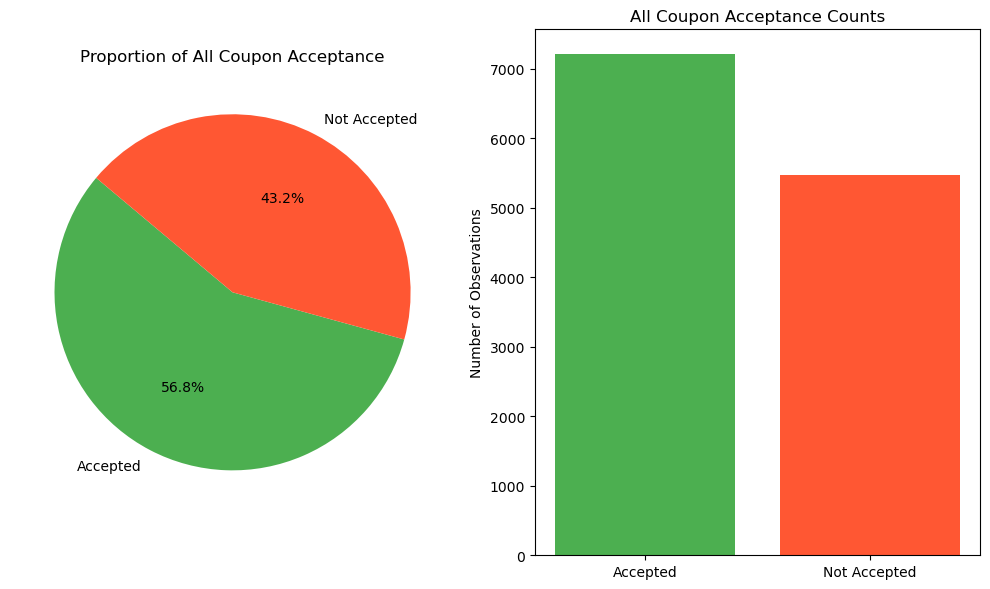

In [133]:
def calculate_acceptance_rates(df):
    # Calculate the total number of observations
    total_observations = df['y'].count()

    # Calculate the number of observations where the coupon was accepted
    accepted_coupons = df[df['y'] == 1]['y'].count()

    # Calculate the number of observations where the coupon was not accepted
    rejected_coupons = total_observations - accepted_coupons

    return  {
        'accepted': accepted_coupons, 
        'rejected':rejected_coupons,
        'total':total_observations
    }
    

def plot_coupon_acceptance(df, coupon_type):

    #calculate values
    calculated_values = calculate_acceptance_rates(df)

    # Data for the plot
    labels = ['Accepted', 'Not Accepted']
    sizes = [calculated_values['accepted'], calculated_values['rejected']]
    colors = ['#4CAF50', '#FF5733']

    # Plotting the pie chart
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of {coupon_type} Coupon Acceptance')

    # Plotting the bar chart
    plt.subplot(1, 2, 2)
    plt.bar(labels, sizes, color=colors)
    plt.title(f'{coupon_type} Coupon Acceptance Counts')
    plt.ylabel('Number of Observations')

    # Show the plots
    plt.tight_layout() #cleans up the size of fonts and spacing.
    plt.savefig(f'images/{coupon_type}_coupon_acceptance.png')
    plt.show()

plot_coupon_acceptance(data, 'All')

5. Use a bar plot to visualize the `coupon` column.

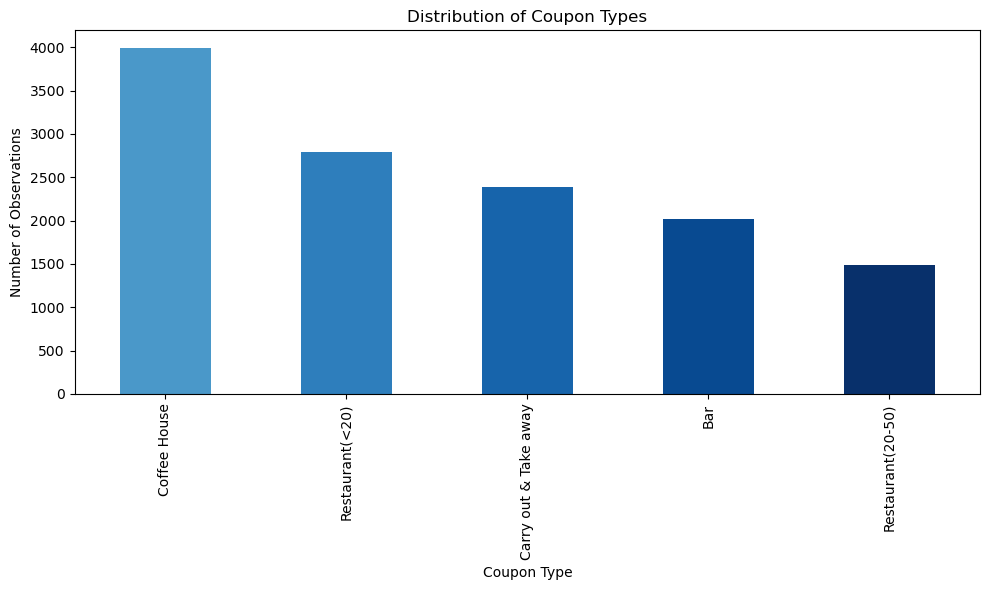

In [134]:
# Calculate the counts of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Generate a list of colors using the 'Blues' colormap
colors = plt.cm.Blues(np.linspace(0.6, 1, len(coupon_counts)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar',  color=colors)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Number of Observations')

# Save the plot to /images directory
plt.tight_layout()
plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

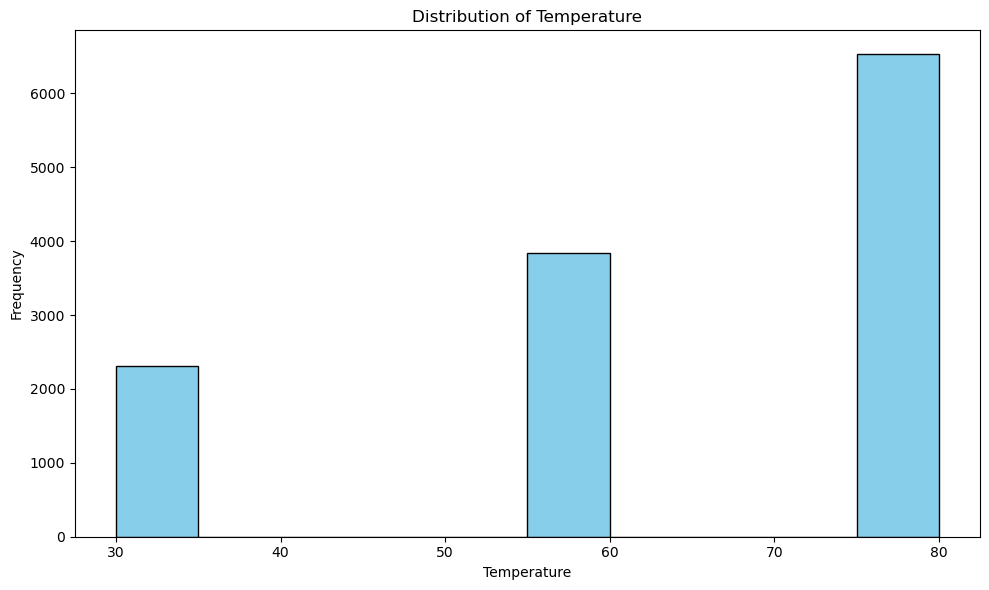

In [135]:

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Save the plot to /images directory
plt.tight_layout()
plt.savefig('images/temperature_distribution.png')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [136]:
bar_coupon_data = data[data['coupon']=='Bar']
bar_coupon_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,bar,coffee_house,carry_away,restaurant_less_than_20,restaurant_20_to_50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


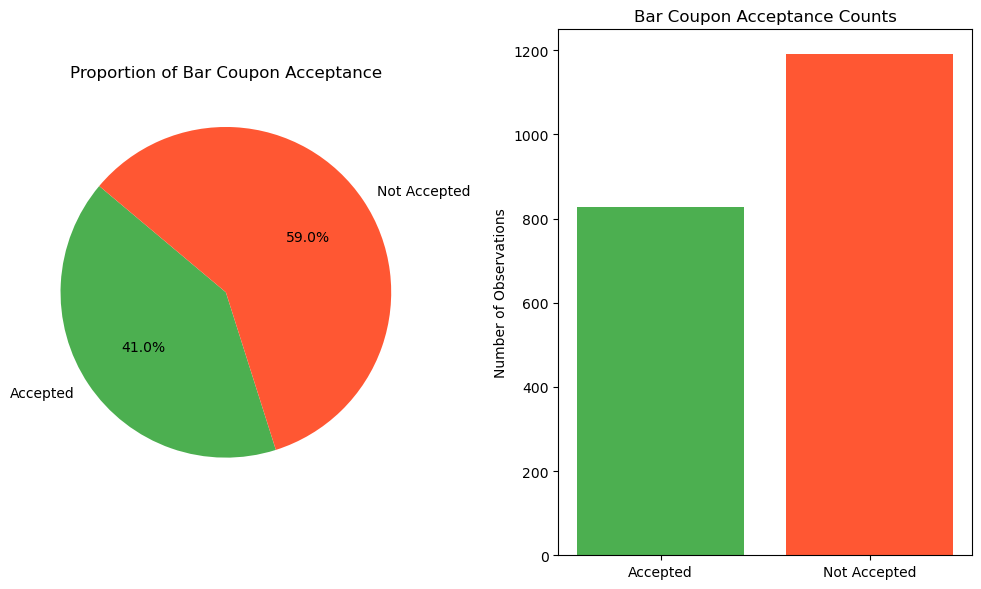

In [137]:
plot_coupon_acceptance(bar_coupon_data, 'Bar')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


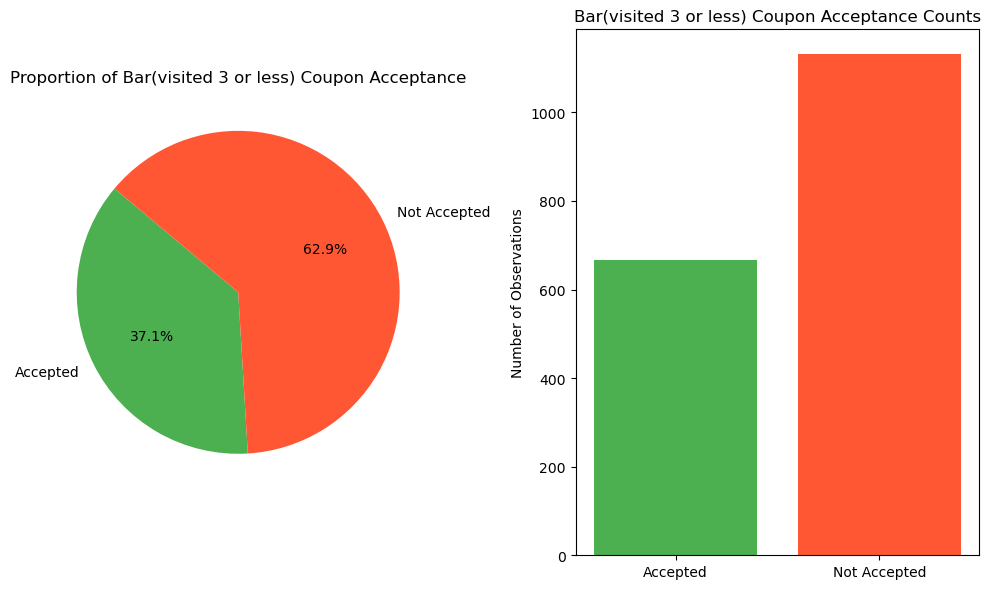

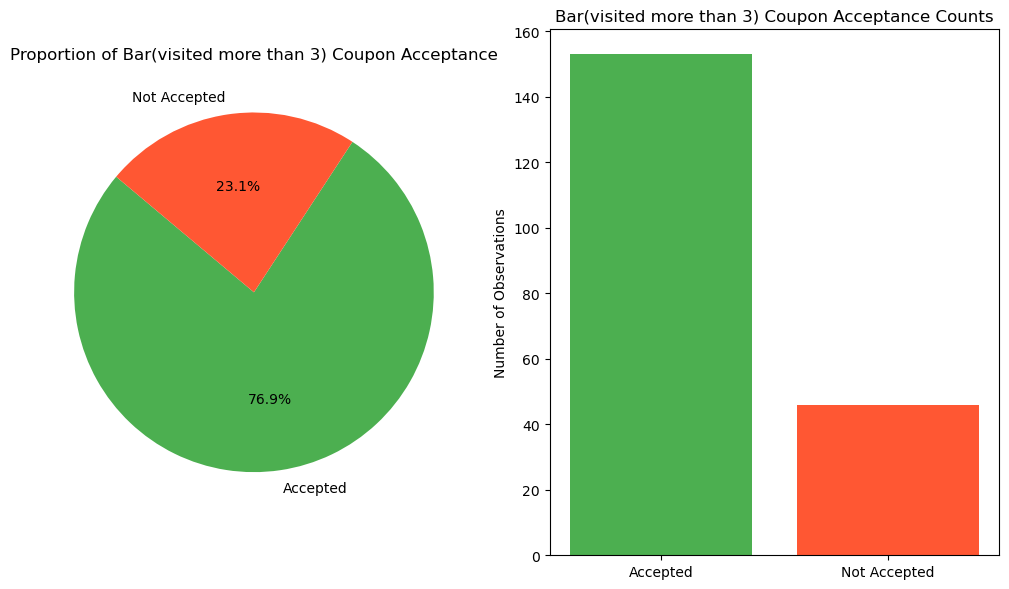

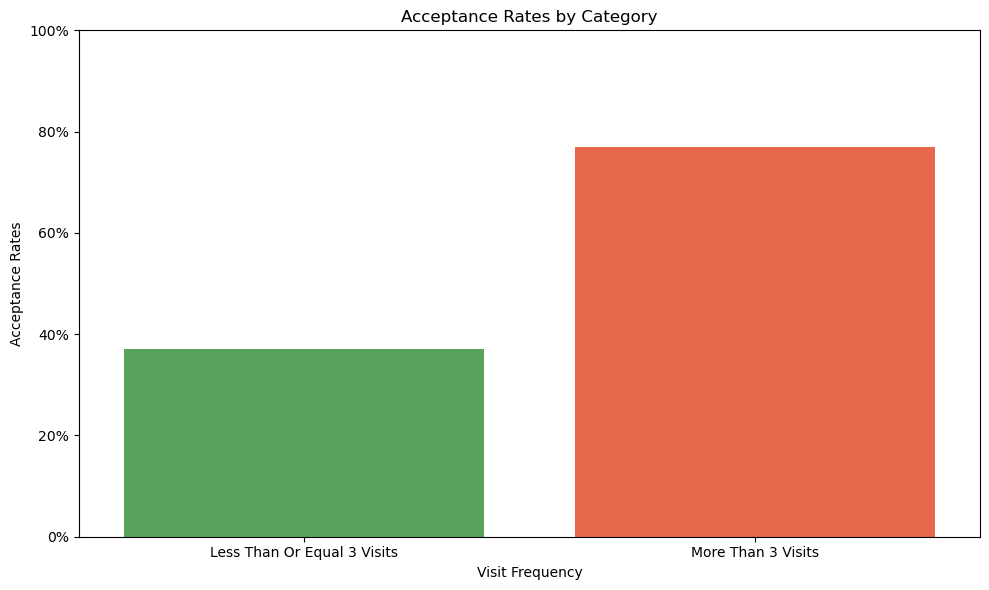

In [138]:
# Filter the DataFrame based on the frequency of bar visits ( note unknown is ignored )
lte3_bar_visits = bar_coupon_data[bar_coupon_data['bar'].isin(['never', 'less1', '1~3'])] #includes 1-3, less1 and never
gt3_bar_visits = bar_coupon_data[bar_coupon_data['bar'].isin(['gt8', '4~8'])] #includes gt8 and 4-8

plot_coupon_acceptance(lte3_bar_visits, 'Bar(visited 3 or less)')
plot_coupon_acceptance(gt3_bar_visits, 'Bar(visited more than 3)')

lte3_bar_visits_rates = calculate_acceptance_rates(lte3_bar_visits)
gt3_bar_visits_rates = calculate_acceptance_rates(gt3_bar_visits)

# Plot graph( using seaborn for some variation)
plot_data = {
    'Categories': ['Less Than Or Equal 3 Visits', 'More Than 3 Visits'], 
    'Acceptance Rates': [
        (lte3_bar_visits_rates['accepted'] / lte3_bar_visits_rates['total'])*100,
        (gt3_bar_visits_rates['accepted']/gt3_bar_visits_rates['total'])*100
    ]
}
plot_dataframe = pd.DataFrame(plot_data)

# Create figure with specified size
plt.figure(figsize=(10, 6))

# Create bar graph
colors = ['#4CAF50', '#FF5733'] #Bar colors
barplot = sns.barplot(x='Categories', y='Acceptance Rates', data=plot_dataframe, palette=colors)

# Set labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Acceptance Rates')
plt.title('Acceptance Rates by Category')

# Format y-axis as percentages
barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.ylim(0, 100)

# Save the plot to /images directory
plt.tight_layout()
plt.savefig('images/acceptance_rates_lte3_vs_gt3.png')

# Show the graph
plt.show()

def plot_comparison( 
        categories, 
        option_1_df, 
        options_2_df,
        title,
        xlabel,
        ylabel,
    ):
    option_1_rates = calculate_acceptance_rates(option_1_df)
    option_2_rates = calculate_acceptance_rates(options_2_df)

    # Plot graph( using seaborn for some variation)
    plot_data = {
        'Categories':categories, 
        'Acceptance Rates': [
            (option_1_rates['accepted'] / option_1_rates['total'])*100,
            (options_2_df['accepted']/options_2_df['total'])*100
        ]
    }
    plot_dataframe = pd.DataFrame(plot_data)

    # Create figure with specified size
    plt.figure(figsize=(10, 6))

    # Create bar graph
    colors = ['#4CAF50', '#FF5733'] #Bar colors
    barplot = sns.barplot(x='Categories', y='Acceptance Rates', data=plot_dataframe, palette=colors)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Format y-axis as percentages
    barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
    plt.ylim(0, 100)

    # Save the plot to /images directory
    plt.tight_layout()
    plt.savefig('images/acceptance_rates_lte3_vs_gt3.png')

    # Show the graph
    plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


['never' 'less1' '1~3' 'gt8' nan '4~8'] ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


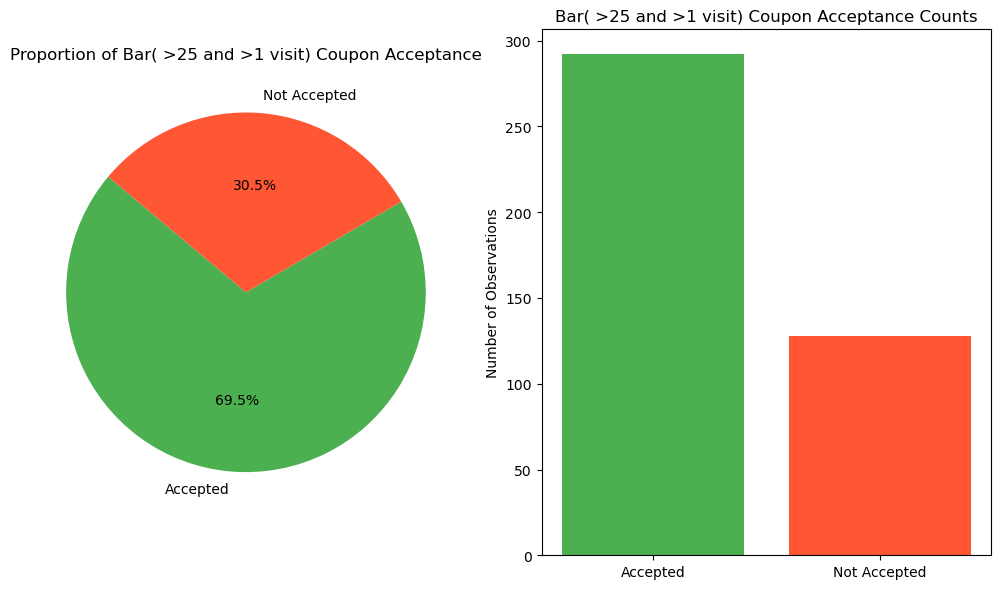

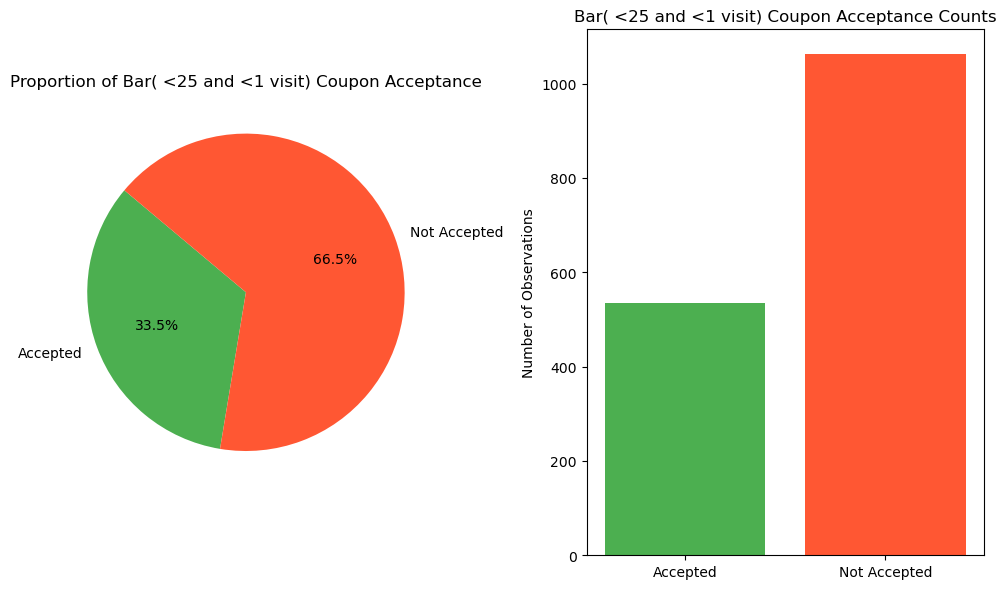

(420, 26)
(1597, 26)


In [146]:
#NOTE: This question can not be answered accurately because of the grouping of data. We have access to
# to Bar which is not a number, but a string that represents a range of number of visits. Since there is 
# no range that represents 1, I will compare 1 or more. It should also be noted that the data does not
# state the acutal unit, or time frame. Assuming that 'Bar' is visits per month
# Filter the DataFrame based on the frequency of bar visits ( note unknown is ignored )

#Get all the distinct values for Age and Bar
distinct_bar_values = data['bar'].unique()
distinct_age_values = data['age'].unique()
print(distinct_bar_values, distinct_age_values)

#filter datasets
more_than_once_a_month_values = [ '1~3', 'gt8', '4~8'] 
less_than_25_values = ['21','below21']
gt_25_age_and_visits_gt_1 = bar_coupon_data[((bar_coupon_data['bar'].isin(more_than_once_a_month_values))&(~bar_coupon_data['age'].isin(less_than_25_values)))] 
all_other = bar_coupon_data[~((bar_coupon_data['bar'].isin(more_than_once_a_month_values))&(~bar_coupon_data['age'].isin(less_than_25_values)))] 

#plot data
plot_coupon_acceptance(gt_25_age_and_visits_gt_1, 'Bar( >25 and >1 visit)')
plot_coupon_acceptance(all_other, 'Bar( <25 and <1 visit)')

gt_25_age_and_visits_gt_1_rates = calculate_acceptance_rates(lte3_bar_visits)
all_other_rates = calculate_acceptance_rates(gt3_bar_visits)

#verify data filtering
print(gt_25_age_and_visits_gt_1.shape)
print(all_other.shape)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  